In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_colwidth', -1)

In [35]:
data = pd.read_csv("D:\Денис2\DA_lab1\students_data.csv")
data.shape

(1044, 36)

In [4]:
data.head(15)

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3.0,2,1,1.0,4.0,5,12,NaN,15,13,14
1,101021,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5.0,3,4,1.0,3.0,3,2,NaN,17,18,17
2,102965,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,no,no,no,no,no,yes,yes,no,4.0,4,5,3.0,5.0,5,0,yes,9,8,10
3,102989,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4.0,4,3,1.0,1.0,3,4,no,14,15,16
4,103131,Por,GP,F,16,U,GT3,T,1,1,at_home,other,home,mother,2,1,0,no,yes,no,no,yes,yes,no,NaN,4.0,3,2,1.0,4.0,5,2,yes,12,13,13
5,103144,Por,GP,M,18,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,yes,yes,yes,yes,yes,3.0,3,4,4.0,5.0,4,2,NaN,11,11,12
6,105257,Por,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1.0,1,1,1.0,1.0,5,6,NaN,11,12,9
7,107639,Por,MS,F,15,R,GT3,T,4,4,teacher,other,course,mother,2,1,0,no,no,no,no,yes,yes,yes,yes,1.0,5,1,3.0,5.0,5,0,NaN,13,14,14
8,107914,Math,GP,F,15,U,LE3,T,3,2,services,other,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4.0,4,4,1.0,1.0,5,10,no,7,6,6
9,108089,Por,MS,M,16,R,GT3,T,3,4,other,health,other,mother,3,2,0,no,no,no,no,no,yes,no,no,3.0,4,5,1.0,2.0,5,4,NaN,9,10,11


In [5]:
criteria = pd.read_csv('D:\Денис2\DA_lab1\students_data_features.csv',
            delimiter=';',
            encoding='windows-1251')

# Задание 1

In [6]:
quality = []
quality_ordered = []
numeric = []
types = data.dtypes
for i in range(36):
    ch_qual_ordered = True
    crit = data[criteria['Признак'][i]]
    if types[i] == 'object':
        quality.append(criteria['Признак'][i])
    else:
        for j in range(50):
            if (crit[j] > 5) | (crit[j] < 1):
                ch_qual_ordered = False
        if ch_qual_ordered:
            quality_ordered.append(criteria['Признак'][i])
        else:
            numeric.append(criteria['Признак'][i])
print(quality)
print(quality_ordered)
print(numeric)

['Subject', 'school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'cheating']
['traveltime', 'studytime', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']
['ID', 'age', 'failures', 'absences', 'G1', 'G2', 'G3']


In [7]:
data = data.replace('o', '0')
for i in range(len(quality)):
    for j in range(1044):
        if i == 1:
            if (data[criteria['Признак'][i]][j] != 'Math') & (data[criteria['Признак'][i]][j] != 'Por'):
                if data[criteria['Признак'][i]][j][0] == 'P':
                    data = data.replace(data[criteria['Признак'][i]][j], "Por")
                else:
                    data = data.replace(data[criteria['Признак'][i]][j], "Math")
        elif i == 2:
            if (data[criteria['Признак'][i]][j] != 'GP') & (data[criteria['Признак'][i]][j] != 'MS'):
                if data[criteria['Признак'][i]][j][0] == 'G':
                    data = data.replace(data[criteria['Признак'][i]][j], "GP")
                else:
                    data = data.replace(data[criteria['Признак'][i]][j], "MS")
        elif i == 3:
            if (data[criteria['Признак'][i]][j] != 'F') & (data[criteria['Признак'][i]][j] != 'F'):
                if data[criteria['Признак'][i]][j][0] != 'F':
                    data = data.replace(data[criteria['Признак'][i]][j], "M")
        elif i == 6:
            if (data[criteria['Признак'][i]][j] != 'LE3') & (data[criteria['Признак'][i]][j] != 'GT3'):
                if data[criteria['Признак'][i]][j][0] == 'G':
                    data = data.replace(data[criteria['Признак'][i]][j], "GT3")
                else:
                    data = data.replace(data[criteria['Признак'][i]][j], "LE3")
        elif i == 7:
            if (data[criteria['Признак'][i]][j] != 'A') & (data[criteria['Признак'][i]][j] != 'T'):
                if data[criteria['Признак'][i]][j][0] != 'A':
                    data = data.replace(data[criteria['Признак'][i]][j], "T")            
        elif i == 10 | i == 11:
            if (data[criteria['Признак'][i]][j] != 'teacher') & (data[criteria['Признак'][i]][j] != 'health') & (data[criteria['Признак'][i]][j] != 'services') & (data[criteria['Признак'][i]][j] != 'at_home') & (data[criteria['Признак'][i]][j] != 'other'):
                if data[criteria['Признак'][i]][j][0] == 't':
                    data = data.replace(data[criteria['Признак'][i]][j], "teacher")
                elif data[criteria['Признак'][i]][j][0] == 'h':
                    data = data.replace(data[criteria['Признак'][i]][j], "health")
                elif data[criteria['Признак'][i]][j][0] == 's':
                    data = data.replace(data[criteria['Признак'][i]][j], "services")
                elif data[criteria['Признак'][i]][j][0] == 'a':
                    data = data.replace(data[criteria['Признак'][i]][j], "at_home")
                else:
                    data = data.replace(data[criteria['Признак'][i]][j], "other")
        elif i == 12:
            if (data[criteria['Признак'][i]][j] != 'home') & (data[criteria['Признак'][i]][j] != 'reputation') & (data[criteria['Признак'][i]][j] != 'course') & (data[criteria['Признак'][i]][j] != 'other'):
                if data[criteria['Признак'][i]][j][0] == 'h':
                    data = data.replace(data[criteria['Признак'][i]][j], "home")
                elif data[criteria['Признак'][i]][j][0] == 'r':
                    data = data.replace(data[criteria['Признак'][i]][j], "reputation")
                elif data[criteria['Признак'][i]][j][0] == 'c':
                    data = data.replace(data[criteria['Признак'][i]][j], "course")
                else:
                    data = data.replace(data[criteria['Признак'][i]][j], "other")
        elif i == 13:
            if (data[criteria['Признак'][i]][j] != 'father') & (data[criteria['Признак'][i]][j] != 'mother') & (data[criteria['Признак'][i]][j] != 'other'):
                if data[criteria['Признак'][i]][j][0] == 'm':
                    data = data.replace(data[criteria['Признак'][i]][j], "mother")
                elif data[criteria['Признак'][i]][j][0] == 'f':
                    data = data.replace(data[criteria['Признак'][i]][j], "father")
                else:
                    data = data.replace(data[criteria['Признак'][i]][j], "other")
        elif 17 <= i <= 24 | i == 32:
            if (data[criteria['Признак'][i]][j] != 'yes') & (data[criteria['Признак'][i]][j] != 'no'):
                if data[criteria['Признак'][i]][j][0] == 'y':
                    data = data.replace(data[criteria['Признак'][i]][j], "yes")
                else:
                    data = data.replace(data[criteria['Признак'][i]][j], "no")

# Задание 2

In [47]:
data.isnull().sum()

ID            0  
Subject       0  
school        0  
sex           0  
age           0  
address       0  
famsize       0  
Pstatus       0  
Medu          0  
Fedu          0  
Mjob          0  
Fjob          0  
reason        0  
guardian      0  
traveltime    0  
studytime     0  
failures      0  
schoolsup     0  
famsup        0  
paid          0  
activities    0  
nursery       0  
higher        0  
internet      0  
romantic      0  
famrel        0  
freetime      0  
goout         0  
Dalc          0  
Walc          0  
health        0  
absences      0  
cheating      700
G1            0  
G2            0  
G3            0  
alcAll        20 
dtype: int64

## изменения:

Dalc, Walc и farmel, так как они числовые изменять на среднее округленное значение

romantic на максимальное из yes/no

cheating, из-за очень большого количества пропусков, игнорируем

In [46]:
aver = data.mean(axis=0)
count_yes = 0
count_no = 0
romantic_point = 'yes'
for i in range(1044):
    if data[criteria['Признак'][24]][j] == 'yes':
        count_yes = count_yes + 1
    elif data[criteria['Признак'][24]][j] == 'no':
        count_no = count_no + 1
if count_yes < count_no:
    romantic_point = 'no'
values = {'famrel': aver['famrel'], 'Dalc': aver['Dalc'], 'Walc': aver['Walc'], 'romantic': romantic_point}
data = data.fillna(value=values)
#data.isnull().sum()

# Задание 3

In [10]:
data.describe()

,ID,age,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,547057.194444,16.726054,1.522989,1.970307,0.264368,3.936170,3.201149,3.156130,1.497099,2.291103,3.543103,4.434866,11.213602,11.246169,11.341954
std,263827.336666,1.239975,0.731727,0.834353,0.656142,0.928812,1.031507,1.152575,0.910412,1.281694,1.424703,6.210017,2.983394,3.285071,3.864796
min,100097.000000,15.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,324017.500000,16.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,554339.500000,17.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,774486.000000,18.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,999194.000000,22.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [11]:
GP = len(data.loc[data['school'] == 'GP'])
MS = len(data.loc[data['school'] == 'MS'])
print(GP, 'students in GP.', MS,'students in MS')

772 students in GP. 272 students in MS


In [12]:
math = len(data.loc[data['Subject'] == 'Math'])
por = len(data.loc[data['Subject'] == 'Por'])
print(math, 'students learn Math.', por,'students learn Por')

395 students learn Math. 649 students learn Por


In [13]:
math_fail = data.loc[data['Subject']=='Math', 'failures'].sum()
por_fail = data.loc[data['Subject']=='Por', 'failures'].sum()
print(math_fail, "failed in Math.", por_fail, "failed in Por")

132 failed in Math. 144 failed in Por


In [14]:
por_studytime = data.loc[data['Subject'] == 'Por', 'studytime'].median()
math_studytime = data.loc[data['Subject'] == 'Math', 'studytime'].median()
if math_studytime == 1:
    print("1-2 hours spend on Math on average")
elif math_studytime == 2:
    print("2-5 hours spend on Math on average")
elif math_studytime == 3:
    print("5-10 hours spend on Math on average")
elif math_studytime == 4:
    print(">10 hours spend on Math on average")
if por_studytime == 1:
    print("1-2 hours spend on Por on average")
elif por_studytime == 2:
    print("2-5 hours spend on Por on average")
elif por_studytime == 3:
    print("5-10 hours spend on Por on average")
elif por_studytime == 4:
    print(">10 hours spend on Por on average")

2-5 hours spend on Math on average
2-5 hours spend on Por on average


In [15]:
print(data['reason'].value_counts())
print("The main factors in choose school is", data['reason'].value_counts().idxmax())

course        430
home          258
reputation    248
other         108
Name: reason, dtype: int64
The main factors in choose school is course


# Задание 4

In [16]:
math_g1 = []
math_g2 = []
math_g3 = []
por_g1 = []
por_g2 = []
por_g3 = []
for i in range(1044):
    if data[criteria['Признак'][1]][i] == "Math":
        math_g1.append(data[criteria['Признак'][33]][i])
        math_g2.append(data[criteria['Признак'][34]][i])
        math_g3.append(data[criteria['Признак'][35]][i])
    else:
        por_g1.append(data[criteria['Признак'][33]][i])
        por_g2.append(data[criteria['Признак'][34]][i])
        por_g3.append(data[criteria['Признак'][35]][i])

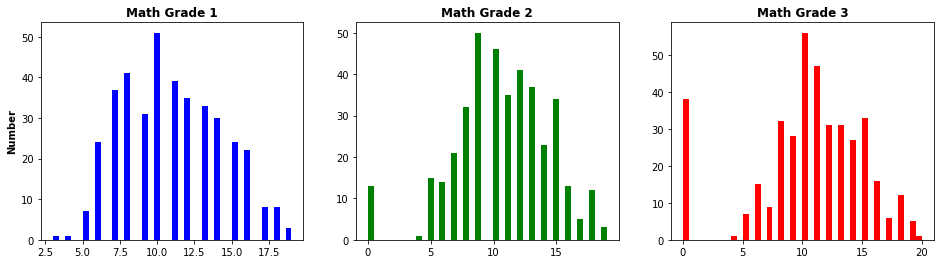

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,figsize=(16, 4))
ax1.set_title('Math Grade 1', fontweight = 'bold')
ax1.set_ylabel('Number', fontweight = 'bold')
ax2.set_title('Math Grade 2', fontweight = 'bold')
ax3.set_title('Math Grade 3', fontweight = 'bold')
ax1.hist(math_g1, bins = 40, color='b')
ax2.hist(math_g2, bins = 40, color='g')
ax3.hist(math_g3, bins = 40, color='r')
plt.show()

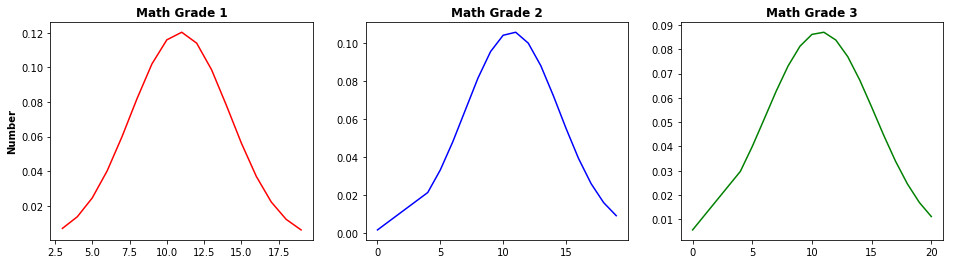

In [18]:
math_g1.sort()
hmean1 = np.mean(math_g1)
hstd1 = np.std(math_g1)
pdf1 = sts.norm.pdf(math_g1, hmean1, hstd1)
math_g2.sort()
hmean2 = np.mean(math_g2)
hstd2 = np.std(math_g2)
pdf2 = sts.norm.pdf(math_g2, hmean2, hstd2)
math_g3.sort()
hmean3 = np.mean(math_g3)
hstd3 = np.std(math_g3)
pdf3 = sts.norm.pdf(math_g3, hmean2, hstd3)
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,figsize=(16, 4))
ax1.set_title('Math Grade 1', fontweight = 'bold')
ax1.set_ylabel('Number', fontweight = 'bold')
ax2.set_title('Math Grade 2', fontweight = 'bold')
ax3.set_title('Math Grade 3', fontweight = 'bold')
ax1.plot(math_g1, pdf1, color = 'r')
ax2.plot(math_g2, pdf2, color = 'b')
ax3.plot(math_g3, pdf3, color = 'g')
plt.show()

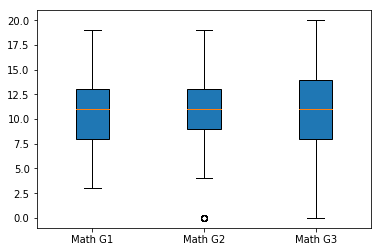

In [19]:
box_plot_data = [math_g1, math_g2, math_g3]
plt.boxplot(box_plot_data, patch_artist=True, labels=['Math G1','Math G2','Math G3'])
plt.show()

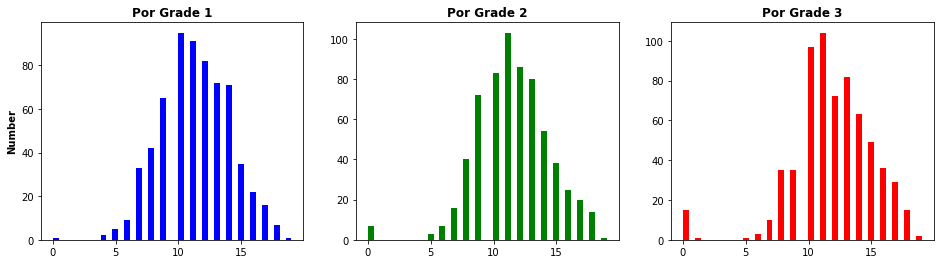

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,figsize=(16, 4))
ax1.set_title('Por Grade 1', fontweight = 'bold')
ax1.set_ylabel('Number', fontweight = 'bold')
ax2.set_title('Por Grade 2', fontweight = 'bold')
ax3.set_title('Por Grade 3', fontweight = 'bold')
ax1.hist(por_g1, bins = 40, color='b')
ax2.hist(por_g2, bins = 40, color='g')
ax3.hist(por_g3, bins = 40, color='r')
plt.show()

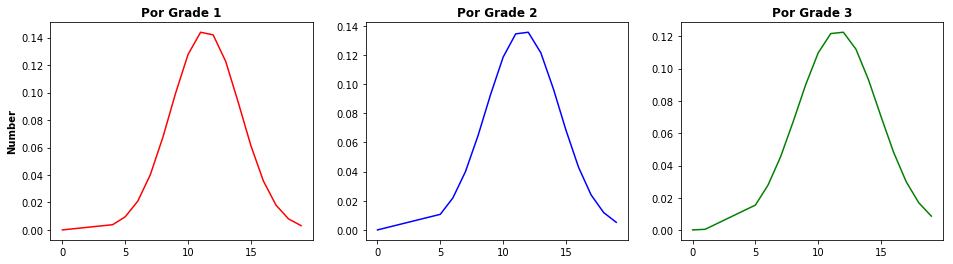

In [21]:
por_g1.sort()
hmean1 = np.mean(por_g1)
hstd1 = np.std(por_g1)
pdf1 = sts.norm.pdf(por_g1, hmean1, hstd1)
por_g2.sort()
hmean2 = np.mean(por_g2)
hstd2 = np.std(por_g2)
pdf2 = sts.norm.pdf(por_g2, hmean2, hstd2)
por_g3.sort()
hmean3 = np.mean(por_g3)
hstd3 = np.std(por_g3)
pdf3 = sts.norm.pdf(por_g3, hmean2, hstd3)
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,figsize=(16, 4))
ax1.set_title('Por Grade 1', fontweight = 'bold')
ax1.set_ylabel('Number', fontweight = 'bold')
ax2.set_title('Por Grade 2', fontweight = 'bold')
ax3.set_title('Por Grade 3', fontweight = 'bold')
ax1.plot(por_g1, pdf1, color = 'r')
ax2.plot(por_g2, pdf2, color = 'b')
ax3.plot(por_g3, pdf3, color = 'g')
plt.show()

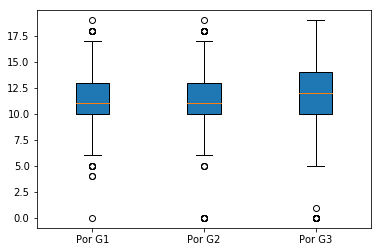

In [22]:
box_plot_data = [por_g1, por_g2, por_g3]
plt.boxplot(box_plot_data, patch_artist=True, labels=['Por G1','Por G2','Por G3'])
plt.show()

На математики средний балл оба полугодия и итоговый был одиннаковый, но при этом колебания во 2 модуле были меньше, чем в 1 и по итогу. Средний балл по португальскому в G3 был самый большой, как и колебания. При этом стоит заметить, что в отличии от математики здесь было больше выбросов.

# Задание 5

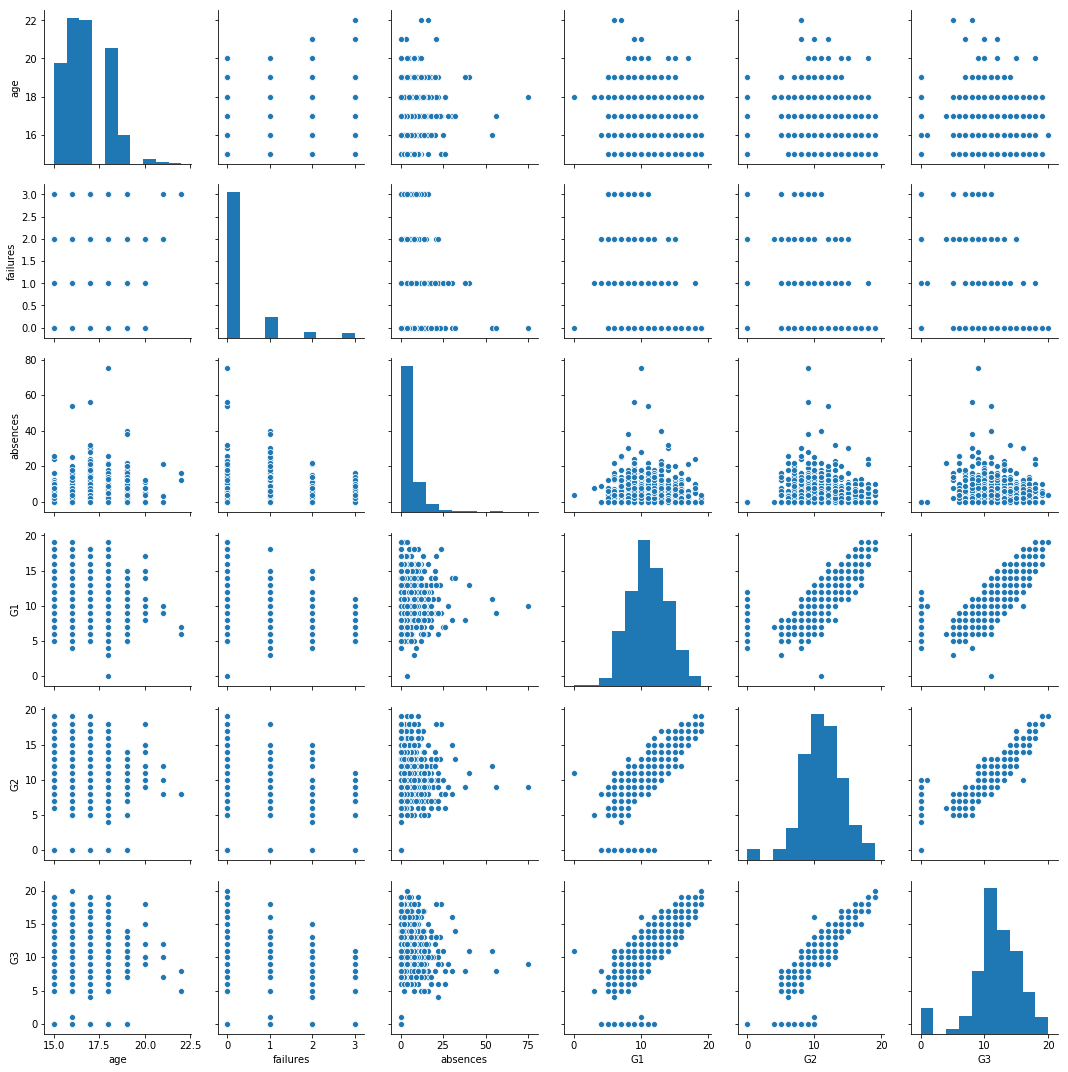

In [23]:
sns.pairplot(data[numeric[1:]])

# Задание 6

In [24]:
data2 = data 
data2 
data2['Subject'].replace("Math",1,inplace=True) 
data2['Subject'].replace("Por",2,inplace=True) 
data2['school'].replace("GP",1,inplace=True) 
data2['school'].replace("MS",2,inplace=True) 
data2['sex'].replace("M",1,inplace=True) 
data2['sex'].replace("F",2,inplace=True) 
data2['address'].replace("U",1,inplace=True) 
data2['address'].replace("R",2,inplace=True) 
data2['famsize'].replace("GT3",1,inplace=True) 
data2['famsize'].replace("LE3",2,inplace=True) 
data2['Pstatus'].replace("A",1,inplace=True) 
data2['Pstatus'].replace("T",2,inplace=True) 
data2.replace("services",1,inplace=True) 
data2.replace("teacher",2,inplace=True) 
data2.replace("at_home",4,inplace=True) 
data2.replace("health",5,inplace=True) 
data2.replace("other",3,inplace=True) 
data2.replace("course",1,inplace=True) 
data2.replace("home",2,inplace=True) 
data2.replace("reputation",4,inplace=True) 
data2['guardian'].replace("father",1,inplace=True) 
data2['guardian'].replace("mother",2,inplace=True) 
data2.replace("yes",1,inplace=True) 
data2.replace("no",2,inplace=True) 
data2.replace(True,1,inplace=True) 
data2.replace(False,2,inplace=True) 
сategorical2 = ["Subject", "school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup", "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]

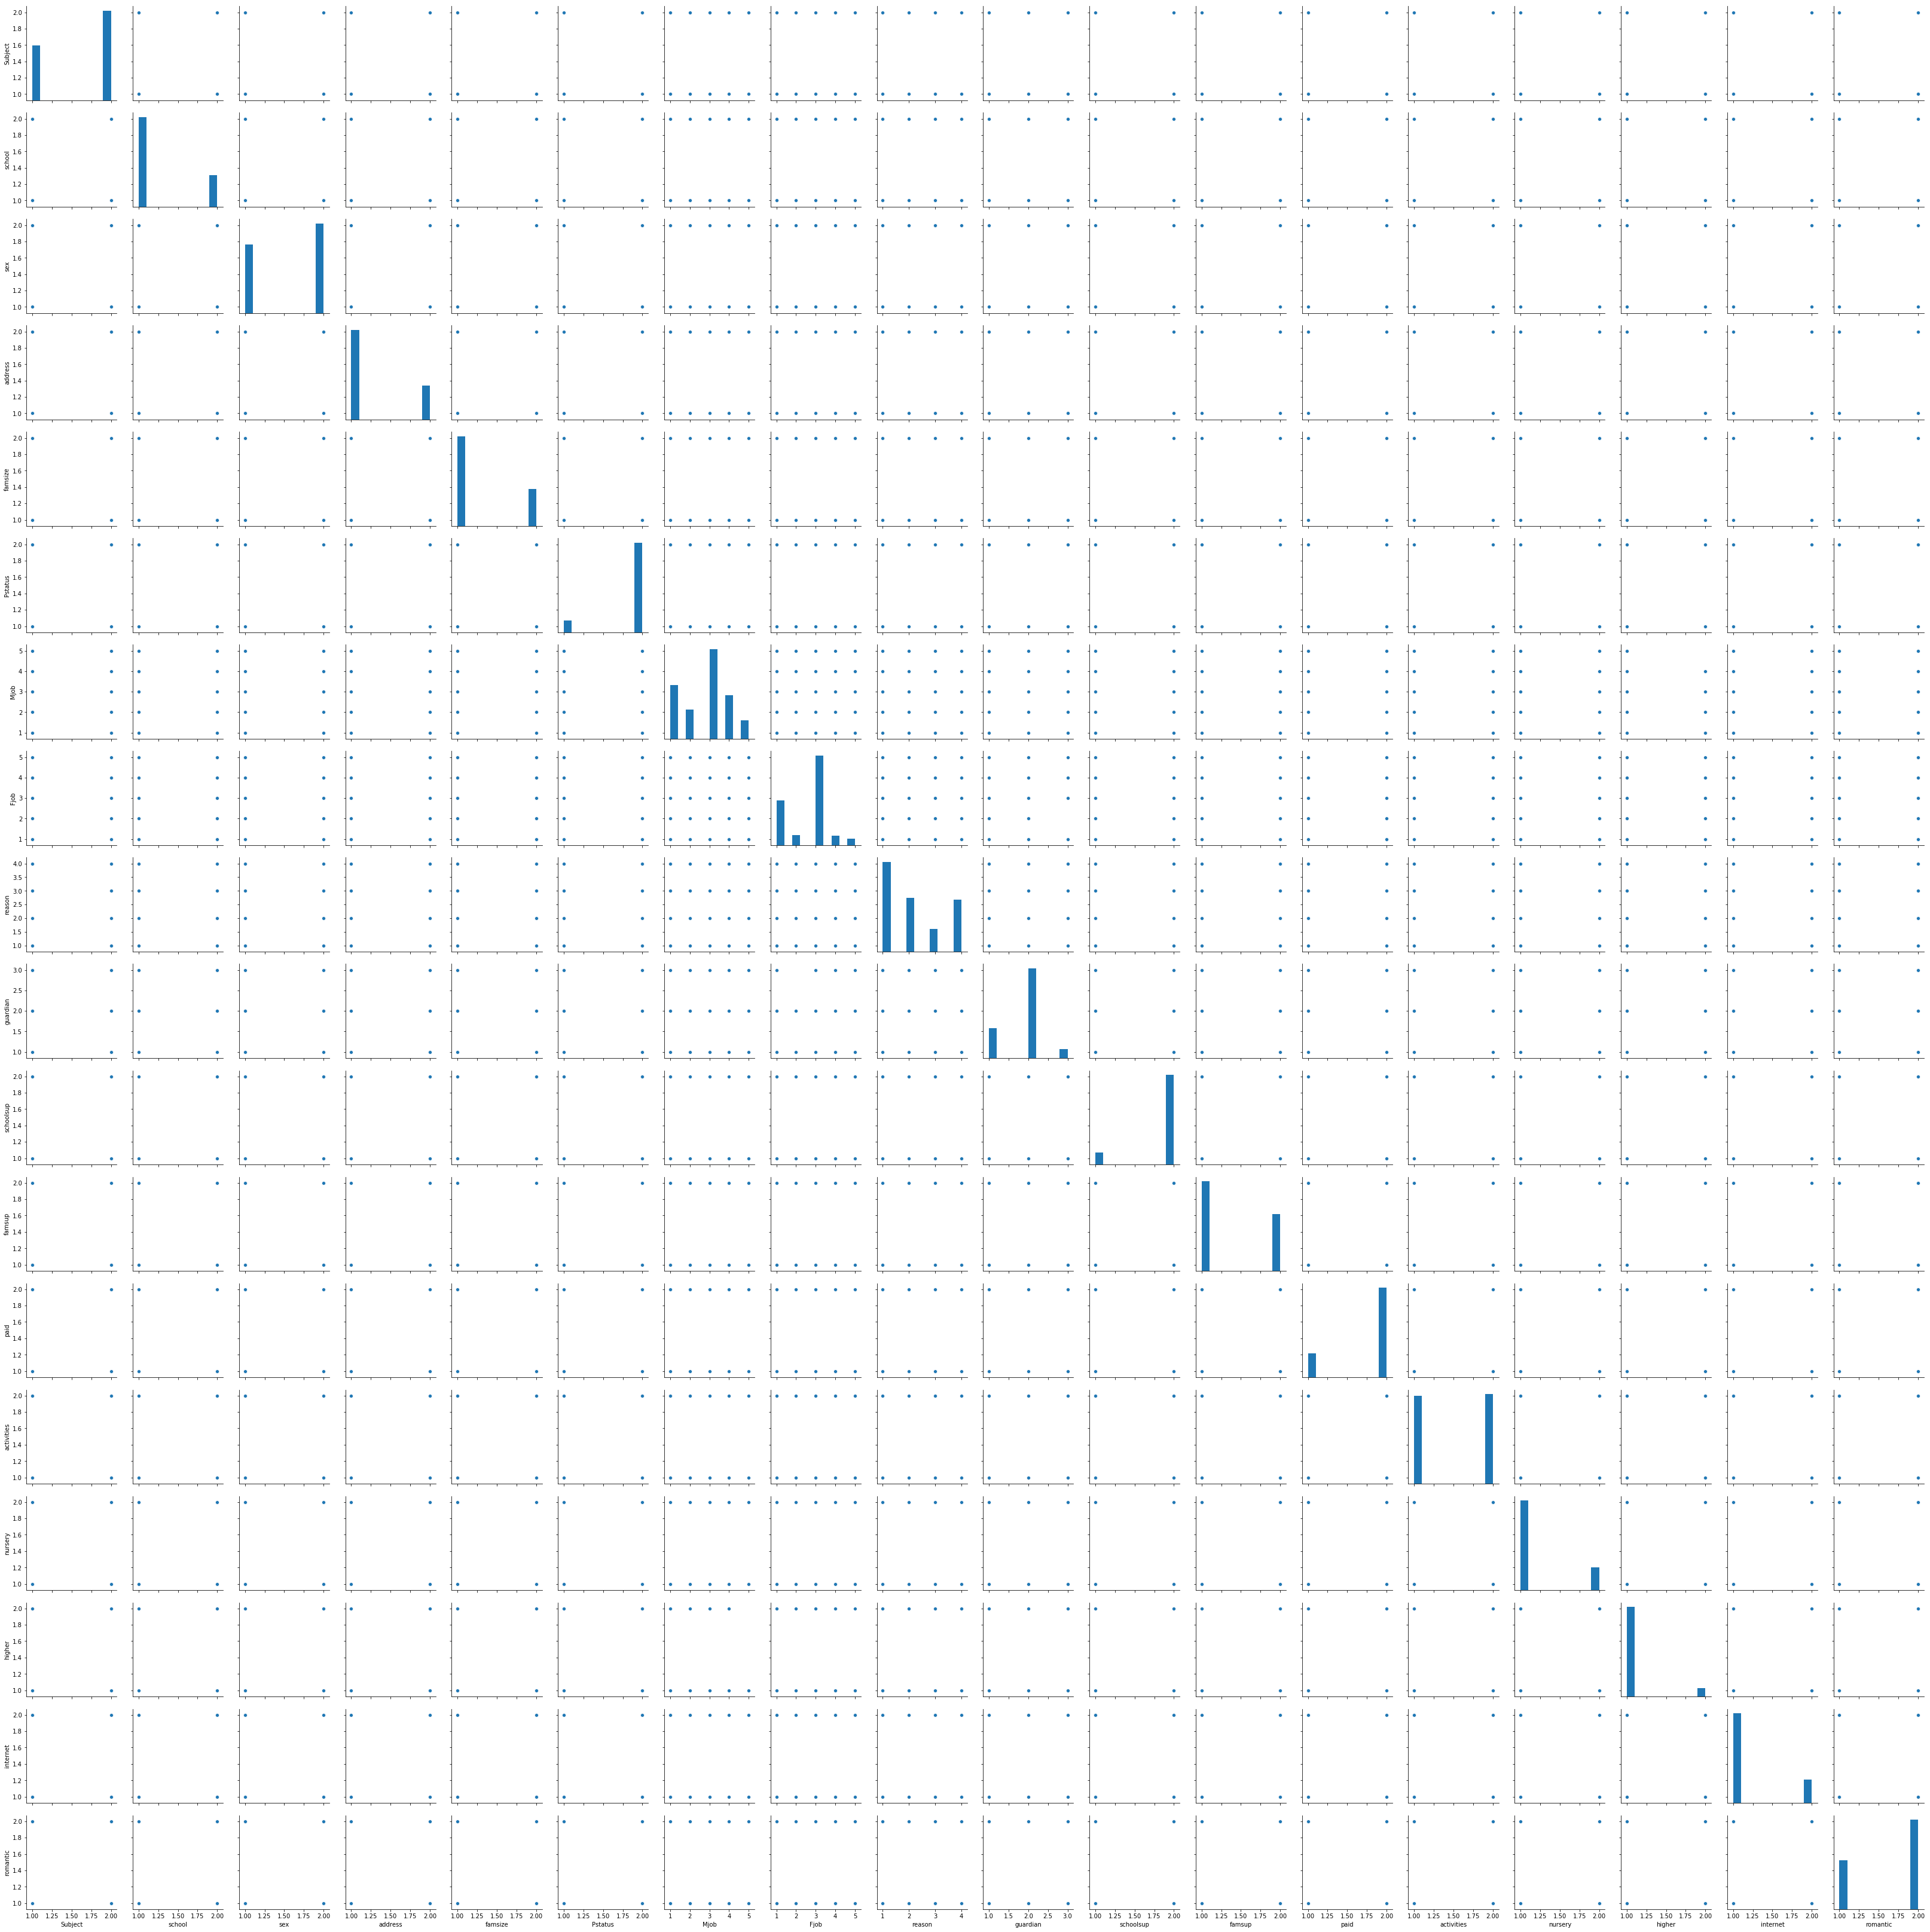

In [25]:
sns.pairplot(data2[сategorical2])

# Задание 7

In [48]:
alc = data.loc[:, ['Walc', 'Dalc']]
alc_avg = []
for i in range(len(alc)):
    avg = (alc['Walc'][i] + alc['Dalc'][i]) / 2
    alc_avg.append(avg)
data['alcAll'] = alc_avg

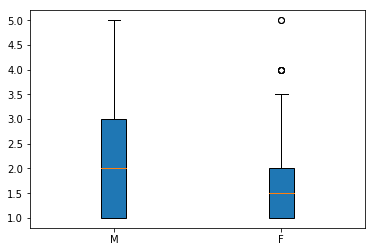

In [49]:
plt.boxplot([data.loc[data['sex']=='M', 'alcAll'], data.loc[data['sex']=='F', 'alcAll']], patch_artist=True, labels=['M','F'])
plt.show()

In [50]:
M_drink = data.loc[data['sex']=='M', 'alcAll'].median()
F_drink = data.loc[data['sex']=='F', 'alcAll'].median()
print(M_drink)
print(F_drink)

2.0
1.5


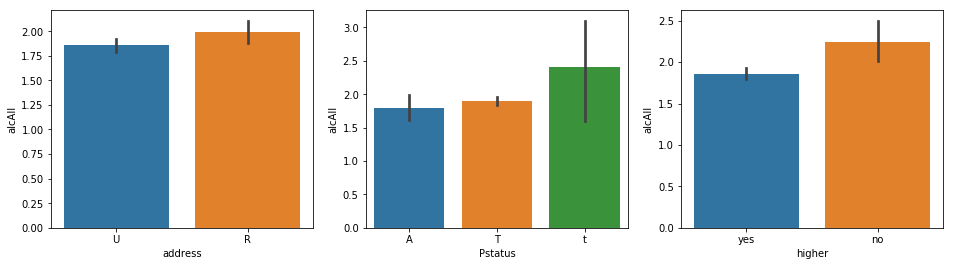

In [51]:
f, axes = plt.subplots(1, 3, figsize=(16, 4))
sns.barplot(data=data, y='alcAll', x='address', estimator=np.mean, ax = axes[0])
sns.barplot(data=data, y='alcAll', x='Pstatus', estimator=np.mean, ax = axes[1])
sns.barplot(data=data, y='alcAll', x='higher', estimator=np.mean, ax = axes[2])

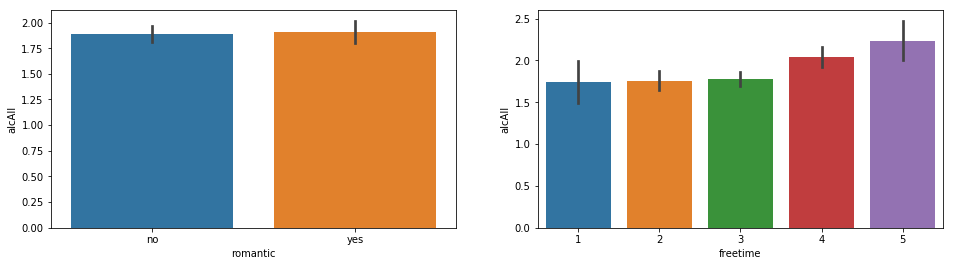

In [52]:
f, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.barplot(data=data, y='alcAll', x='romantic', estimator=np.mean, ax = axes[0])
sns.barplot(data=data, y='alcAll', x='freetime', estimator=np.mean, ax = axes[1])

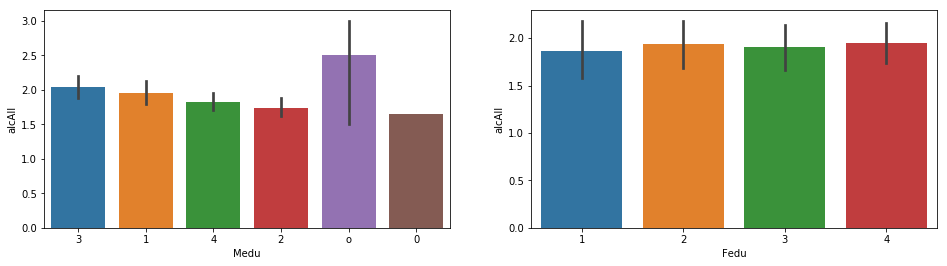

In [53]:
f, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.barplot(data=data.loc[data['guardian'] == 'mother', ['alcAll','Medu']], y='alcAll', x='Medu', estimator=np.mean, ax=axes[0])
sns.barplot(data=data.loc[data['guardian'] == 'father', ['alcAll','Fedu']], y='alcAll', x='Fedu', estimator=np.mean, ax=axes[1])

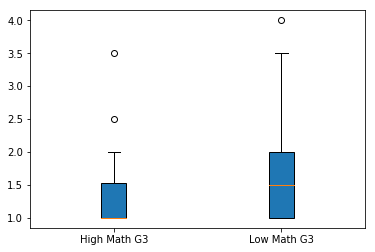

In [54]:
math_g3 = [data.nlargest(50, 'G3')['alcAll'][data['Subject'] == 'Math'], data.nsmallest(50, 'G3')['alcAll'][data['Subject'] == 'Math']]
plt.boxplot(math_g3, patch_artist=True, labels=['High Math G3','Low Math G3'])
plt.show()

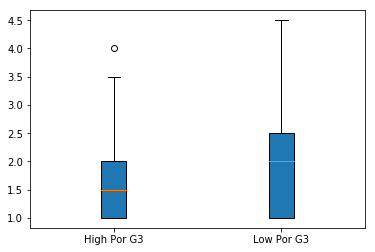

In [55]:
math_g3 = [data.nlargest(50, 'G3')['alcAll'][data['Subject'] == 'Por'], data.nsmallest(50, 'G3')['alcAll'][data['Subject'] == 'Por']]
plt.boxplot(math_g3, patch_artist=True, labels=['High Por G3','Low Por G3'])
plt.show()

In [56]:
print("High50 G3 Math drink:", data.nlargest(50, 'G3')['alcAll'][data['Subject'] == 'Math'].median())
print("Lowh50 G3 Math drink:", data.nsmallest(50, 'G3')['alcAll'][data['Subject'] == 'Math'].median())
print("High50 G3 Por drink:", data.nlargest(50, 'G3')['alcAll'][data['Subject'] == 'Por'].median())
print("Lowh50 G3 Por drink:", data.nsmallest(50, 'G3')['alcAll'][data['Subject'] == 'Por'].median())

High50 G3 Math drink: 1.0
Lowh50 G3 Math drink: 1.5
High50 G3 Por drink: 1.5
Lowh50 G3 Por drink: 2.0


Оба графика показывают, что как в математике, так и в португальском люди, находящиеся в низу рейтинга пиют больше и по среднем показателям, и по объему, и по максимальным показателям.

# Задание 8

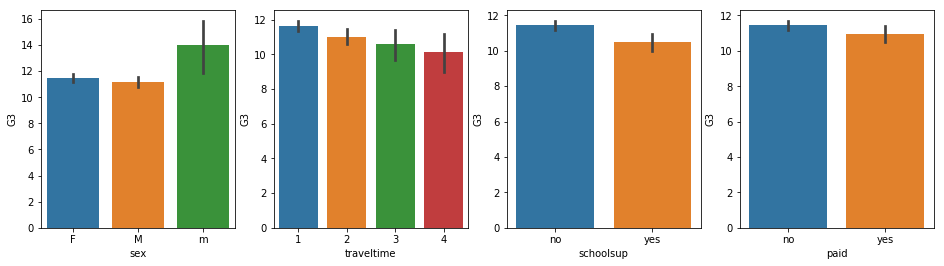

In [57]:
f, axes = plt.subplots(1, 4, figsize=(16, 4))
sns.barplot(data=data, y='G3', x='sex', estimator=np.mean, ax = axes[0])
sns.barplot(data=data, y='G3', x='traveltime', estimator=np.mean, ax = axes[1])
sns.barplot(data=data, y='G3', x='schoolsup', estimator=np.mean, ax = axes[2])
sns.barplot(data=data, y='G3', x='paid', estimator=np.mean, ax = axes[3])

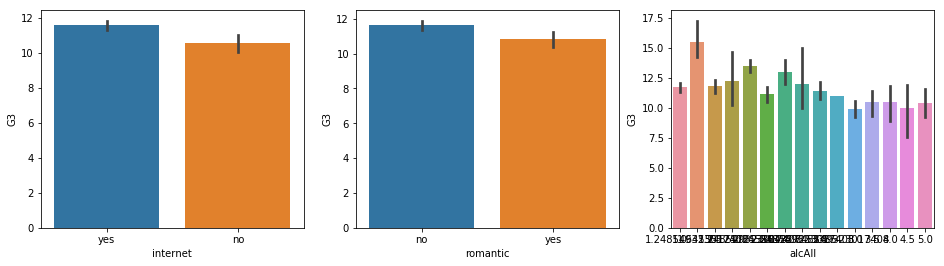

In [58]:
f, axes = plt.subplots(1, 3, figsize=(16, 4))
sns.barplot(data=data, y='G3', x='internet', estimator=np.mean, ax = axes[0])
sns.barplot(data=data, y='G3', x='romantic', estimator=np.mean, ax = axes[1])
sns.barplot(data=data, y='G3', x='alcAll', estimator=np.mean, ax = axes[2])

# Задание 9 

In [59]:
G3_change = []
for i in range(1044):
    gr = data[criteria['Признак'][35]][i]
    if gr < 8:
        G3_change.append(1)
    elif (gr >= 8) & (gr <= 13):
        G3_change.append(2)
    elif (gr >= 14) & (gr <= 17):
        G3_change.append(3)
    else:
        G3_change.append(4)
data['G3_change'] = G3_change

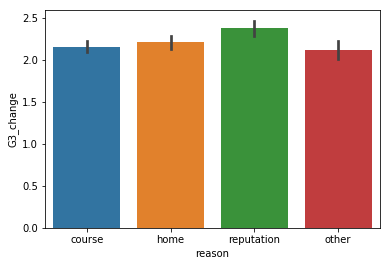

In [60]:
sns.barplot(data=data, y="G3_change", x="reason")

В среднем показатели по новому признаку в зависимости от причины более менее равны, но репутация школы имеет наибольший показатель среди всех 4х показателей.

# Задание 10

In [63]:
ID_with = data[criteria['Признак'][2:33]] 
ID_without = ID_with.drop_duplicates() 
print(len(ID_with) - len(ID_without), "студентов посещающий 2 курса существует") 
mass_dupliсates = ID_with.index[ID_with.duplicated()] 
for i in range(len(mass_dupliсates)): 
    for j in range(1044): 
        check = True 
        for k in range(2, 32): 
            if (ID_with[criteria['Признак'][k]][mass_dupliсates[i]]) != (ID_with[criteria['Признак'][k]][j]): 
                check = False 
        if (check == True) & (mass_dupliсates[i] != j): 
            print(mass_dupliсates[i], "и", j, ": mark is", data[criteria['Признак'][35]][mass_dupliсates[i]], "and", data[criteria['Признак'][35]][j])

17 студентов посещающий 2 курса существует
721 и 470 : mark is 12 and 12
727 и 301 : mark is 11 and 11
758 и 199 : mark is 10 and 11
765 и 571 : mark is 16 and 14
771 и 647 : mark is 15 and 16
823 и 689 : mark is 12 and 13
835 и 202 : mark is 10 and 11
836 и 37 : mark is 12 and 13
895 и 654 : mark is 10 and 9
907 и 774 : mark is 10 and 11
944 и 620 : mark is 12 and 11
996 и 327 : mark is 12 and 15
998 и 328 : mark is 19 and 17
1009 и 107 : mark is 6 and 10
1032 и 669 : mark is 11 and 9
1035 и 652 : mark is 15 and 16
1038 и 1030 : mark is 13 and 11


Определяем так, чтоб совпадали все поля, кроме ID, Subject, G1, G2, G3
Все пары выписываем и определяем оценки по обоим курсам